In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df1 = pd.read_csv('prices.csv')
df1.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df1["symbol"].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

Assuming we choose Apple stock

In [5]:
apple_stock = df1[df1['symbol'] == 'AAPL']

In [6]:
apple_stock

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
721,2010-01-05,AAPL,214.599998,214.379993,213.249994,215.589994,150476200.0
1189,2010-01-06,AAPL,214.379993,210.969995,210.750004,215.230000,138040000.0
1657,2010-01-07,AAPL,211.750000,210.580000,209.050005,212.000006,119282800.0
2125,2010-01-08,AAPL,210.299994,211.980005,209.060005,212.000006,111902700.0
...,...,...,...,...,...,...,...
848767,2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
849267,2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
849767,2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0
850267,2016-12-29,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0


In [7]:
apple_prices = apple_stock.close.values.astype('float32')
apple_prices = apple_prices.reshape(1762, 1)

In [8]:
apple_prices

array([[214.01   ],
       [214.37999],
       [210.97   ],
       ...,
       [116.76   ],
       [116.73   ],
       [115.82   ]], dtype=float32)

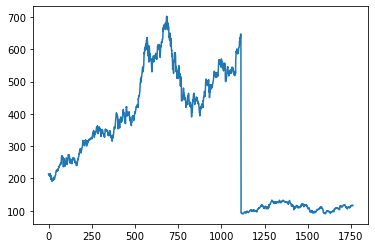

In [9]:
plt.plot(apple_prices)
plt.show()

In [10]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

### Scale stock price

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
apple_prices = scaler.fit_transform(apple_prices)

### Train test split

In [12]:
train_size = int(len(apple_prices) * 0.80)
test_size = len(apple_prices) - train_size
train, test = apple_prices[0:train_size,:], apple_prices[train_size:len(apple_prices),:]
print(len(train), len(test))

1409 353


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [14]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
trainX.shape

(1407, 1, 1)

### One step ahead prediction via averaging

In [17]:
std_avg_predictions = []
std_avg_x = []
mse_errors = []
look_back = 21

for pred_idx in range(look_back, train.size):
    date = apple_stock.date[apple_stock.index[pred_idx]]
    
    std_avg_predictions.append(np.mean(train[pred_idx-look_back:pred_idx]))
    mse_errors.append((std_avg_predictions[-1] - train[pred_idx])**2)
    std_avg_x.append(date)
    
print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))
print(std_avg_x)

MSE error for standard averaging: 0.00252
['2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26', '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11', '2010-03-12', '2010-03-15', '2010-03-16', '2010-03-17', '2010-03-18', '2010-03-19', '2010-03-22', '2010-03-23', '2010-03-24', '2010-03-25', '2010-03-26', '2010-03-29', '2010-03-30', '2010-03-31', '2010-04-01', '2010-04-05', '2010-04-06', '2010-04-07', '2010-04-08', '2010-04-09', '2010-04-12', '2010-04-13', '2010-04-14', '2010-04-15', '2010-04-16', '2010-04-19', '2010-04-20', '2010-04-21', '2010-04-22', '2010-04-23', '2010-04-26', '2010-04-27', '2010-04-28', '2010-04-29', '2010-04-30', '2010-05-03', '2010-05-04', '2010-05-05', '2010-05-06', '2010-05-07', '2010-05-10', '2010-05-11', '2010

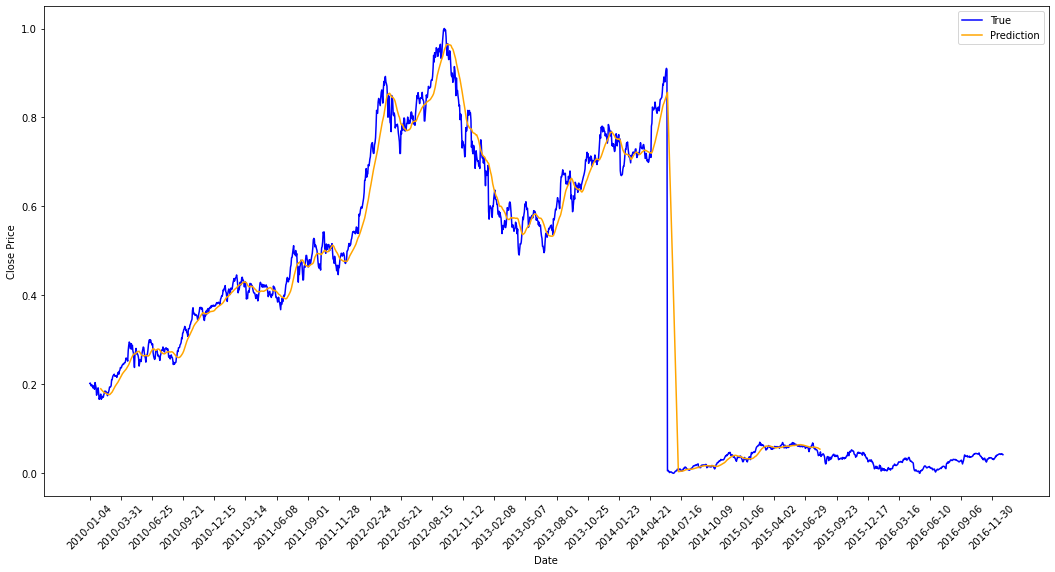

In [18]:
# Visualize one step ahead prediction using stand moving average
plt.figure(figsize=(18, 9))
plt.plot(range(apple_stock.shape[0]), apple_prices, color='b', label='True')
plt.plot(range(look_back, train.size), std_avg_predictions, color='orange', label='Prediction')
plt.xticks(range(0, apple_stock.shape[0], 60), apple_stock.date[apple_stock.index[::60]], rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Exponential Moving Average

In the exponential moving average method, we calculate  $x_{t+1}$  as,

$x_{t+1}=\text{EMA}_t=\gamma×\text{EMA}_{t−1}+(1−\gamma)x_t$  where  $\text{EMA}_0=0$  and  $\text{EMA}$  is the exponential moving average value we maintain over time.

The above equation basically calulates the exponential moving average at $t+1$ time step and uses that as the one step ahead prediction. $\gamma$ decides what is the contribution of the most recent prediction to the $\text{EMA}$. For example, a $\gamma=0.1$  gets only 10% of the current value into the $\text{EMA}$. Because we take only a very small fraction of the most recent, it allows to preserve much older values we saw very early in the average. Let us look how good this looks when used to predict one-step ahead.



In [19]:
run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.1

for pred_idx in range(1,train.size):
    date = apple_stock.date[apple_stock.index[pred_idx]]

    running_mean = running_mean*decay + (1.0-decay)*train[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 0.00036


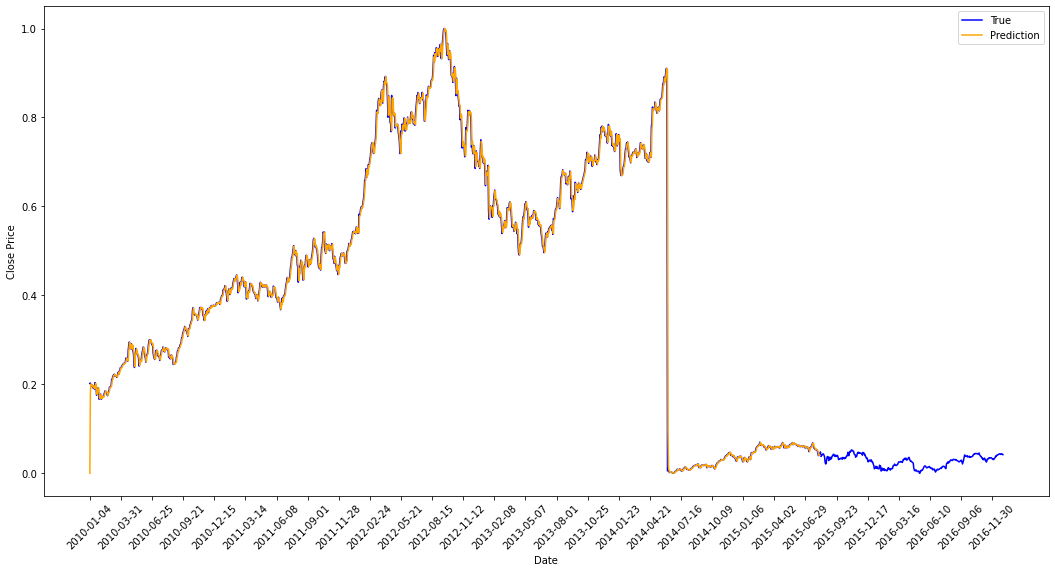

In [20]:
# Visualize one step ahead prediction using exponential moving average
plt.figure(figsize=(18, 9))
plt.plot(range(apple_stock.shape[0]), apple_prices, color='b', label='True')
plt.plot(range(0, train.size), run_avg_predictions, color='orange', label='Prediction')
plt.xticks(range(0, apple_stock.shape[0], 60), apple_stock.date[apple_stock.index[::60]], rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Build LSTM model

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1],1)))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.LSTM(100, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('linear'))

model.compile(loss='mse', optimizer='adam',metrics=['mean_squared_error'])

In [22]:
history = model.fit(trainX, trainY, batch_size=8, epochs=40, validation_split=0.05)

Epoch 1/40
167/167 [==============================] - 5s 12ms/step - loss: 0.1247 - mean_squared_error: 0.1247 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 2/40
167/167 [==============================] - 0s 3ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 3/40
167/167 [==============================] - 0s 3ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 4/40
167/167 [==============================] - 0s 3ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 5/40
167/167 [==============================] - 0s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 6/40
167/167 [==============================] - 0s 3ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 4.0444e-04 - val_mean_squared_error: 4.0444e-04
Epoch 7/40
167/167 

### Plot learning curve

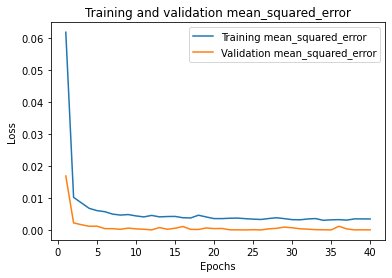

In [23]:
mse_values = history.history['mean_squared_error']
val_mse_values = history.history['val_mean_squared_error']

epochs = range(1, len(mse_values) + 1)

plt.plot(epochs, mse_values, label='Training mean_squared_error')
plt.plot(epochs, val_mse_values, label='Validation mean_squared_error')
plt.title('Training and validation mean_squared_error')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [25]:
trainPredict

array([[0.20237876],
       [0.20297776],
       [0.19745812],
       ...,
       [0.04865035],
       [0.04258618],
       [0.04379866]], dtype=float32)

In [26]:
trainPredict.shape

(1407, 1)

In [27]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [28]:
testY.shape

(1, 351)

In [29]:
testPredict.shape

(351, 1)

### Compare closing prices and our prediction

In [30]:
plot_predicted = testPredict.copy()
plot_predicted = plot_predicted.reshape(351, 1)
plot_actual = testY.copy()
plot_actual = plot_actual.reshape(351, 1)
print(plot_actual.shape)
print(plot_predicted.shape)

(351, 1)
(351, 1)


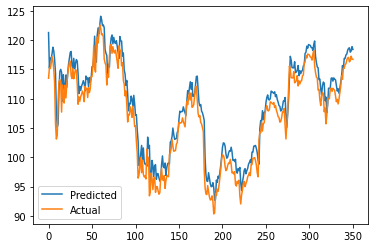

In [31]:
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.legend()
plt.show()